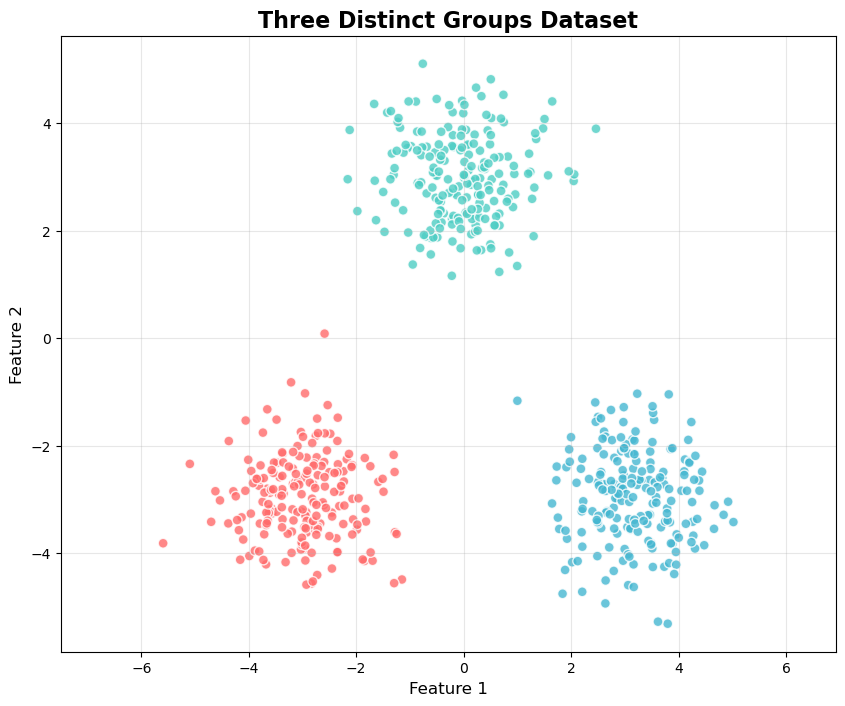

Dataset Information:
Total samples: 600
Group 0 samples: 200
Group 1 samples: 200
Group 2 samples: 200
Input shape: (600, 2)
Target shape: (600, 3)
X range: [-5.59, 5.02]
Y range: [-5.32, 5.11]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

np.random.seed(42)

# Create 3 distinct groups
def make_three_groups(n_per_class=150, separation=2.5):
    # Group 0: Bottom-left cluster
    X0 = np.random.randn(n_per_class, 2) * 0.8 + np.array([-separation, -separation])
    
    # Group 1: Top-center cluster  
    X1 = np.random.randn(n_per_class, 2) * 0.8 + np.array([0, separation])
    
    # Group 2: Bottom-right cluster
    X2 = np.random.randn(n_per_class, 2) * 0.8 + np.array([separation, -separation])
    
    X = np.vstack([X0, X1, X2])
    y_int = np.concatenate([
        np.zeros(n_per_class, dtype=int),
        np.ones(n_per_class, dtype=int), 
        np.full(n_per_class, 2, dtype=int)
    ])
    
    # One-hot encoding for training
    Y = np.zeros((len(y_int), 3), dtype=np.float32)
    Y[np.arange(len(y_int)), y_int] = 1.0
    
    # Shuffle
    idx = np.random.permutation(len(X))
    return X[idx], y_int[idx], Y[idx]

# Generate dataset
X, y_int, Y = make_three_groups(n_per_class=200, separation=3.0)

# Visualize
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_int, 
            cmap=ListedColormap(['#FF6B6B', '#4ECDC4', '#45B7D1']),
            s=50, edgecolors='white', alpha=0.8)
plt.title('Three Distinct Groups Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Dataset info
print("Dataset Information:")
print("=" * 40)
print(f"Total samples: {len(X)}")
print(f"Group 0 samples: {np.sum(y_int == 0)}")
print(f"Group 1 samples: {np.sum(y_int == 1)}") 
print(f"Group 2 samples: {np.sum(y_int == 2)}")
print(f"Input shape: {X.shape}")
print(f"Target shape: {Y.shape}")
print(f"X range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Y range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

In [ ]:
class NN3(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 10
        hiddenLayer2Neurons = 8  
        outLayerNeurons = 3  
        
        self.learning_rate = 0.1
        
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons) * 0.1
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons) * 0.1
        self.W_OH = np.random.randn(hiddenLayer2Neurons, outLayerNeurons) * 0.1
    
    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1 - x)
        else:
            x = np.clip(x, -500, 500)  
            return 1 / (1 + np.exp(-x))
    
    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1)
        self.hidden1_output = self.sigmoid(hidden1_input)
        
        hidden2_input = np.dot(self.hidden1_output, self.W_H2)
        self.hidden2_output = self.sigmoid(hidden2_input)
        
        output_input = np.dot(self.hidden2_output, self.W_OH)
        pred = self.sigmoid(output_input)
        
        return pred
    
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)
        
        hidden2_error = output_delta.dot(self.W_OH.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)
        
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)
        
        self.W_H1 += X.T.dot(hidden1_delta)
        self.W_H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_OH += self.hidden2_output.T.dot(output_delta)
    
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)
    
    def predict(self, X):
        return self.feedForward(X)

In [ ]:
NN = NN3()
err = []

print("Training 3-Layer Neural Network...")
print("=" * 50)

for i in range(3000):
    NN.train(X, Y)
    pred = NN.feedForward(X)
    current_err = np.mean(np.square(Y - pred))
    err.append(current_err)
    
    if i % 500 == 0:
        print(f"Epoch {i:4d}, Loss: {current_err:.6f}")

print("Training completed!")
print("=" * 50)

Training 3-Layer Neural Network...
Epoch    0, Loss: 0.330401
Epoch  500, Loss: 0.000085
Epoch 1000, Loss: 0.000040
Epoch 1500, Loss: 0.000027
Epoch 2000, Loss: 0.000020
Epoch 2500, Loss: 0.000016
Training completed!


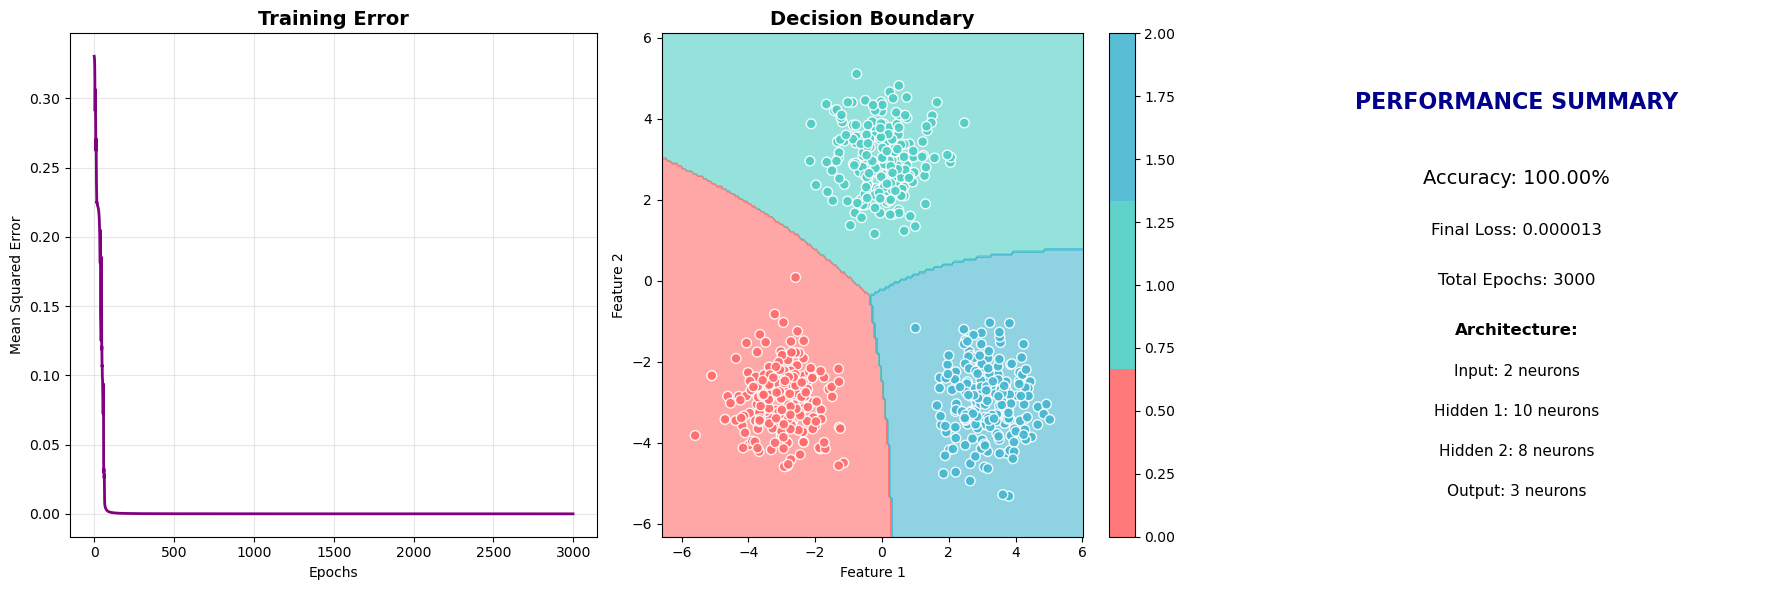


DETAILED PERFORMANCE ANALYSIS
Class 0 Accuracy: 100.00%
Class 1 Accuracy: 100.00%
Class 2 Accuracy: 100.00%

Overall Accuracy: 100.00%
Final Training Loss: 0.000013

SAMPLE PREDICTIONS (first 8 samples)

Sample 1:
  Input: ( -2.82,  -2.99)
  Expected: Class 0
  Predicted: Class 0 ✓
  Probabilities: [0: 0.998, 1: 0.000, 2: 0.001]

Sample 2:
  Input: (  2.98,  -2.56)
  Expected: Class 2
  Predicted: Class 2 ✓
  Probabilities: [0: 0.001, 1: 0.001, 2: 0.998]

Sample 3:
  Input: ( -3.65,  -1.33)
  Expected: Class 0
  Predicted: Class 0 ✓
  Probabilities: [0: 0.998, 1: 0.001, 2: 0.000]

Sample 4:
  Input: (  3.63,  -2.66)
  Expected: Class 2
  Predicted: Class 2 ✓
  Probabilities: [0: 0.000, 1: 0.001, 2: 0.998]

Sample 5:
  Input: ( -0.20,   3.78)
  Expected: Class 1
  Predicted: Class 1 ✓
  Probabilities: [0: 0.000, 1: 0.999, 2: 0.001]

Sample 6:
  Input: ( -3.66,  -2.81)
  Expected: Class 0
  Predicted: Class 0 ✓
  Probabilities: [0: 0.999, 1: 0.000, 2: 0.001]

Sample 7:
  Input: ( -0.29,

In [ ]:
plt.figure(figsize=(18, 6))

# Training error
plt.subplot(1, 3, 1)
plt.plot(err, color='purple', linewidth=2)
plt.title('Training Error', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

# Decision boundary
plt.subplot(1, 3, 2)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), 
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = NN.predict(grid)
Z_classes = np.argmax(Z, axis=1)
Z_classes = Z_classes.reshape(xx.shape)

plt.contourf(xx, yy, Z_classes, alpha=0.6, 
             cmap=ListedColormap(['#FF6B6B', '#4ECDC4', '#45B7D1']))
plt.scatter(X[:, 0], X[:, 1], c=y_int, 
            cmap=ListedColormap(['#FF6B6B', '#4ECDC4', '#45B7D1']),
            s=50, edgecolors='white', alpha=0.9)
plt.title('Decision Boundary', fontsize=14, fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 3, 3)
preds = NN.predict(X)
pred_classes = np.argmax(preds, axis=1)
accuracy = np.mean(pred_classes == y_int)

plt.text(0.5, 0.85, 'PERFORMANCE SUMMARY', fontsize=16, 
         ha='center', fontweight='bold', color='darkblue')
plt.text(0.5, 0.70, f'Accuracy: {accuracy:.2%}', fontsize=14, ha='center')
plt.text(0.5, 0.60, f'Final Loss: {err[-1]:.6f}', fontsize=12, ha='center')
plt.text(0.5, 0.50, f'Total Epochs: {len(err)}', fontsize=12, ha='center')
plt.text(0.5, 0.40, 'Architecture:', fontsize=12, ha='center', fontweight='bold')
plt.text(0.5, 0.32, 'Input: 2 neurons', fontsize=11, ha='center')
plt.text(0.5, 0.24, 'Hidden 1: 10 neurons', fontsize=11, ha='center')
plt.text(0.5, 0.16, 'Hidden 2: 8 neurons', fontsize=11, ha='center')
plt.text(0.5, 0.08, 'Output: 3 neurons', fontsize=11, ha='center')
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*60)

class_acc = []
for i in range(3):
    mask = y_int == i
    acc = np.mean(pred_classes[mask] == y_int[mask])
    class_acc.append(acc)
    print(f"Class {i} Accuracy: {acc:.2%}")

print(f"\nOverall Accuracy: {accuracy:.2%}")
print(f"Final Training Loss: {err[-1]:.6f}")

#Sample predictions
print("\n" + "="*60)
print("SAMPLE PREDICTIONS (first 8 samples)")
print("="*60)

for i in range(8):
    actual = y_int[i]
    predicted_probs = preds[i]
    predicted_class = np.argmax(predicted_probs)
    correct = "✓" if predicted_class == actual else "✗"
    
    print(f"\nSample {i+1}:")
    print(f"  Input: ({X[i, 0]:6.2f}, {X[i, 1]:6.2f})")
    print(f"  Expected: Class {actual}")
    print(f"  Predicted: Class {predicted_class} {correct}")
    print(f"  Probabilities: [0: {predicted_probs[0]:.3f}, 1: {predicted_probs[1]:.3f}, 2: {predicted_probs[2]:.3f}]")